# Assignment 2: Convolutional Autoencoders

Britt Schmitz  - i6235053 <br>
Tabea Heusel - i6323791

## 0 Setup

### 0.1 Imports

In [23]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 0.2 Loading Dataset

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
X = np.append(x_train, x_test, axis=0)
y = np.append(y_train, y_test, axis=0)

## 1 Autoencoder Network Implementation

### 1.1 Train, Validation, and Test 

In [25]:
# normalize
X = X / 255

# create train, validation, and test splits
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=3)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=3)

### 1.2 Autoencoder Network

In [26]:
def create_cae():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

Epoch 1/50
1500/1500 [==============================] - 104s 68ms/step - loss: 0.6311 - accuracy: 0.3816 - val_loss: 0.6559 - val_accuracy: 0.3893
Epoch 2/50
1500/1500 [==============================] - 89s 59ms/step - loss: 0.6064 - accuracy: 0.4021 - val_loss: 0.5948 - val_accuracy: 0.3663
Epoch 3/50
1500/1500 [==============================] - 88s 58ms/step - loss: 0.5968 - accuracy: 0.4175 - val_loss: 0.5908 - val_accuracy: 0.4126
Epoch 4/50
1500/1500 [==============================] - 88s 58ms/step - loss: 0.5903 - accuracy: 0.4251 - val_loss: 0.5879 - val_accuracy: 0.4162
Epoch 5/50
1500/1500 [==============================] - 82s 55ms/step - loss: 0.5872 - accuracy: 0.4277 - val_loss: 0.5860 - val_accuracy: 0.4232
Epoch 6/50
1500/1500 [==============================] - 86s 58ms/step - loss: 0.5861 - accuracy: 0.4309 - val_loss: 0.5849 - val_accuracy: 0.4271
Epoch 7/50
1500/1500 [==============================] - 83s 55ms/step - loss: 0.5855 - accuracy: 0.4319 - val_loss: 0.5839 

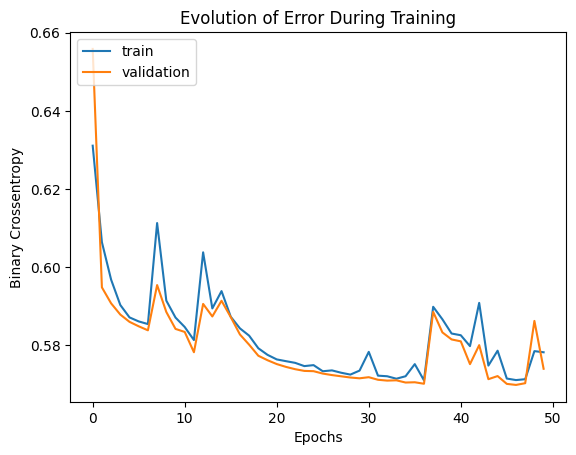

In [5]:
network = create_cae()
network.compile(optimizer="sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = network.fit(X_train, X_train, epochs=50, validation_data=(X_val, X_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Evolution of Error During Training')
plt.legend(['train', 'validation'], loc='upper left')

In [6]:
results = network.evaluate(X_test, X_test)
print(f"Test accuracy: {results[1]} \nTest error : {results[0]}")

188/188 [==============================] - 3s 14ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492


188/188 [==============================] - 3s 13ms/step


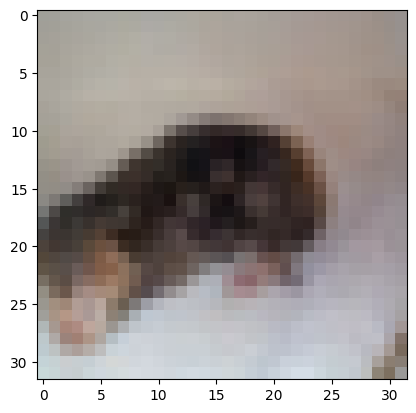

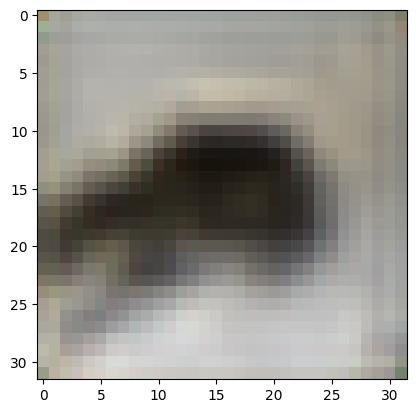

In [7]:
predictions = network.predict(X_test)

plt.imshow(X_test[0])
plt.show()
plt.imshow(predictions[0])
plt.show()

## 2 Latent Space Representations

### 2.1 Latent Space Size of Previous Network

In [3]:
def compute_latent_space_size(w, k, p, s, c):
    num = w - k + 2 * p
    frac = num / s
    square = (frac + 1) ** 2
    result = square * c
    
    return result

In [9]:
w = 8
k = 3
p = 1
s = 1
c = 16

print(compute_latent_space_size(w, k, p, s, c))

1024.0


### 2.2 Correlation Between Latent Space Representation and Error

In [10]:
def create_cae_fewer_layers():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

In [11]:
def create_cae_more_channels():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(24, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(32, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(24, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

In [12]:
def create_cae_fewer_channels():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(4, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(6, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(6, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

In [13]:
def create_cae_bigger_filter():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 5, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 5, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 5, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 5, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 5, 1, "same", activation="relu"))
    
    return model

In [14]:
def create_cae_bigger_stride():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 2, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 3, 2, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 2, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 3, 2, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 2, "same", activation="relu"))
    
    return model

In [15]:
def create_cae_valid_padding():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "valid", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="valid"))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "valid", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="valid"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "valid", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(3))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "valid", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(4))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "valid", activation="relu"))
    
    return model

In [21]:
def experiment(model, model_name):
    print(f"Experimenting with {model_name} model: \n")
    model.compile(optimizer="sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    history = model.fit(X_train, X_train, epochs=50, validation_data=(X_val, X_val))
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Binary Crossentropy')
    plt.title('Evolution of Error During Training')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    results = model.evaluate(X_test, X_test)
    print(f"Test accuracy: {results[1]} \nTest error : {results[0]}")
    
    predictions = model.predict(X_test)
    plt.imshow(X_test[0])
    plt.show()
    plt.imshow(predictions[0])
    plt.show()

Experimenting with fewer layers model: 
Epoch 1/50
1500/1500 [==============================] - 65s 43ms/step - loss: 0.6105 - accuracy: 0.4472 - val_loss: 0.5928 - val_accuracy: 0.4596
Epoch 2/50
1500/1500 [==============================] - 83s 55ms/step - loss: 0.5827 - accuracy: 0.4529 - val_loss: 0.5767 - val_accuracy: 0.4693
Epoch 3/50
1500/1500 [==============================] - 75s 50ms/step - loss: 0.5750 - accuracy: 0.5599 - val_loss: 0.5700 - val_accuracy: 0.6433
Epoch 4/50
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5688 - accuracy: 0.6224 - val_loss: 0.5668 - val_accuracy: 0.6276
Epoch 5/50
1500/1500 [==============================] - 69s 46ms/step - loss: 0.5663 - accuracy: 0.6355 - val_loss: 0.5650 - val_accuracy: 0.6520
Epoch 6/50
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5650 - accuracy: 0.6404 - val_loss: 0.5641 - val_accuracy: 0.6507
Epoch 7/50
1500/1500 [==============================] - 67s 45ms/step - loss: 0.5645

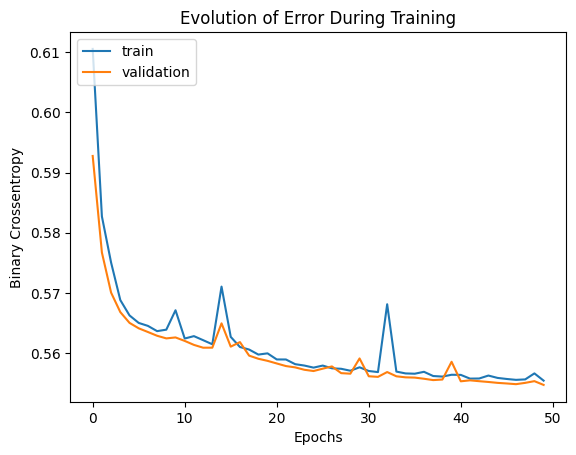

188/188 [==============================] - 2s 12ms/step - loss: 0.5543 - accuracy: 0.7948
Test accuracy: 0.7947977185249329 
Test error : 0.5542874336242676
188/188 [==============================] - 2s 10ms/step


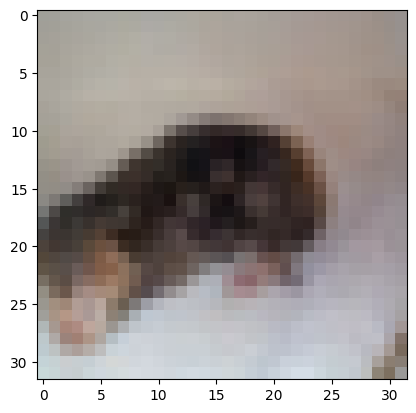

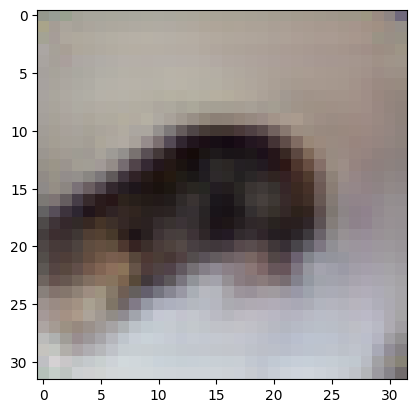

Experimenting with more channels model: 
Epoch 1/50
1500/1500 [==============================] - 117s 78ms/step - loss: 0.6142 - accuracy: 0.4055 - val_loss: 0.5943 - val_accuracy: 0.4479
Epoch 2/50
1500/1500 [==============================] - 131s 87ms/step - loss: 0.5967 - accuracy: 0.4444 - val_loss: 0.5862 - val_accuracy: 0.4877
Epoch 3/50
1500/1500 [==============================] - 127s 85ms/step - loss: 0.5911 - accuracy: 0.4707 - val_loss: 0.5864 - val_accuracy: 0.4327
Epoch 4/50
1500/1500 [==============================] - 125s 84ms/step - loss: 0.5853 - accuracy: 0.4458 - val_loss: 0.5821 - val_accuracy: 0.4821
Epoch 5/50
1500/1500 [==============================] - 122s 82ms/step - loss: 0.5862 - accuracy: 0.4948 - val_loss: 0.5798 - val_accuracy: 0.5369
Epoch 6/50
1500/1500 [==============================] - 126s 84ms/step - loss: 0.5786 - accuracy: 0.5868 - val_loss: 0.5750 - val_accuracy: 0.6107
Epoch 7/50
1500/1500 [==============================] - 120s 80ms/step - loss

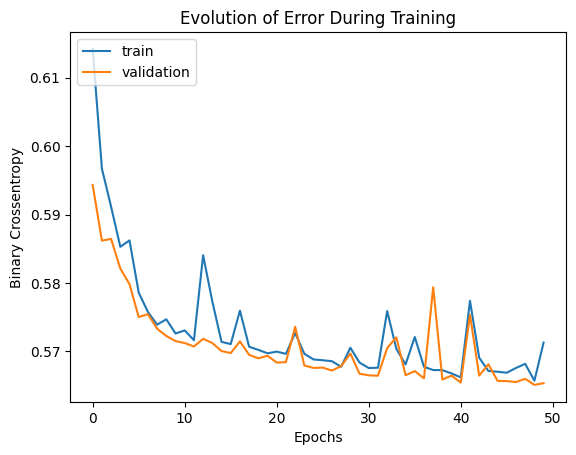

188/188 [==============================] - 3s 16ms/step - loss: 0.5649 - accuracy: 0.6886
Test accuracy: 0.6885911226272583 
Test error : 0.564898669719696
188/188 [==============================] - 3s 15ms/step


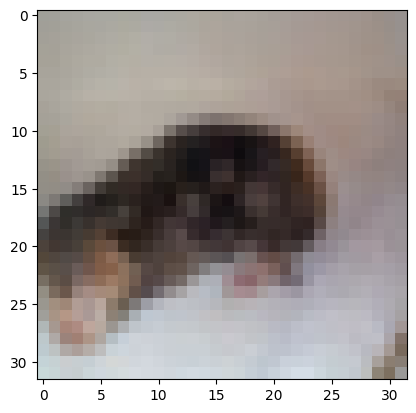

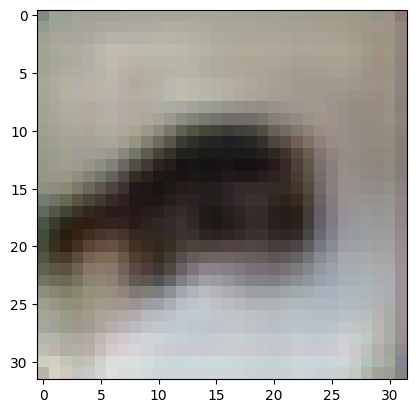

Experimenting with fewer channels model: 
Epoch 1/50
1500/1500 [==============================] - 61s 40ms/step - loss: 0.6734 - accuracy: 0.3991 - val_loss: 0.6799 - val_accuracy: 0.4863
Epoch 2/50
1500/1500 [==============================] - 60s 40ms/step - loss: 0.6807 - accuracy: 0.4439 - val_loss: 0.6910 - val_accuracy: 0.5094
Epoch 3/50
1500/1500 [==============================] - 60s 40ms/step - loss: 0.6911 - accuracy: 0.5096 - val_loss: 0.6910 - val_accuracy: 0.5094
Epoch 4/50
1500/1500 [==============================] - 60s 40ms/step - loss: 0.6911 - accuracy: 0.5096 - val_loss: 0.6910 - val_accuracy: 0.5094
Epoch 5/50
1500/1500 [==============================] - 60s 40ms/step - loss: 0.6911 - accuracy: 0.5096 - val_loss: 0.6910 - val_accuracy: 0.5094
Epoch 6/50
1500/1500 [==============================] - 60s 40ms/step - loss: 0.6911 - accuracy: 0.5096 - val_loss: 0.6910 - val_accuracy: 0.5094
Epoch 7/50
1500/1500 [==============================] - 60s 40ms/step - loss: 0.69

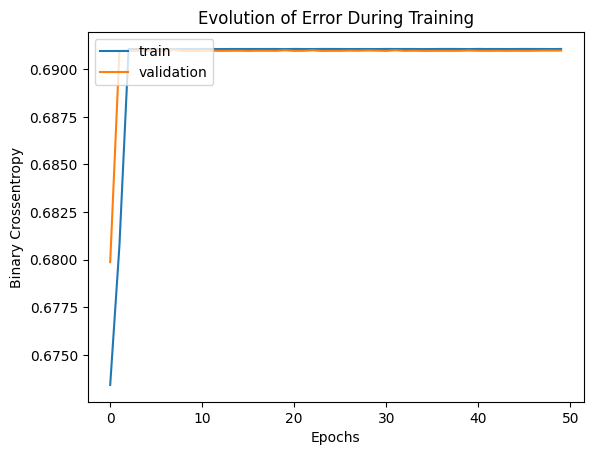

188/188 [==============================] - 3s 14ms/step - loss: 0.6910 - accuracy: 0.5066
Test accuracy: 0.5065696835517883 
Test error : 0.6910344958305359
188/188 [==============================] - 3s 13ms/step


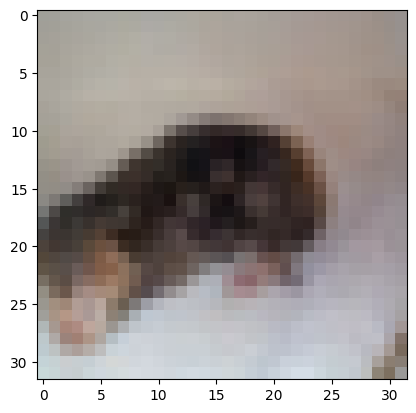

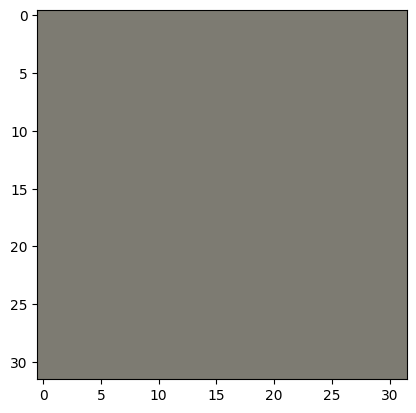

Experimenting with bigger filter model: 
Epoch 1/50
1500/1500 [==============================] - 150s 99ms/step - loss: 0.6355 - accuracy: 0.4397 - val_loss: 0.6005 - val_accuracy: 0.4202
Epoch 2/50
1500/1500 [==============================] - 145s 96ms/step - loss: 0.6192 - accuracy: 0.4348 - val_loss: 0.6139 - val_accuracy: 0.4374
Epoch 3/50
1500/1500 [==============================] - 144s 96ms/step - loss: 0.6100 - accuracy: 0.4276 - val_loss: 0.5959 - val_accuracy: 0.4173
Epoch 4/50
1500/1500 [==============================] - 145s 97ms/step - loss: 0.5938 - accuracy: 0.4286 - val_loss: 0.5900 - val_accuracy: 0.4316
Epoch 5/50
1500/1500 [==============================] - 145s 96ms/step - loss: 0.5917 - accuracy: 0.4622 - val_loss: 0.5849 - val_accuracy: 0.5457
Epoch 6/50
1500/1500 [==============================] - 145s 97ms/step - loss: 0.5906 - accuracy: 0.5494 - val_loss: 0.6486 - val_accuracy: 0.2366
Epoch 7/50
1500/1500 [==============================] - 146s 97ms/step - loss

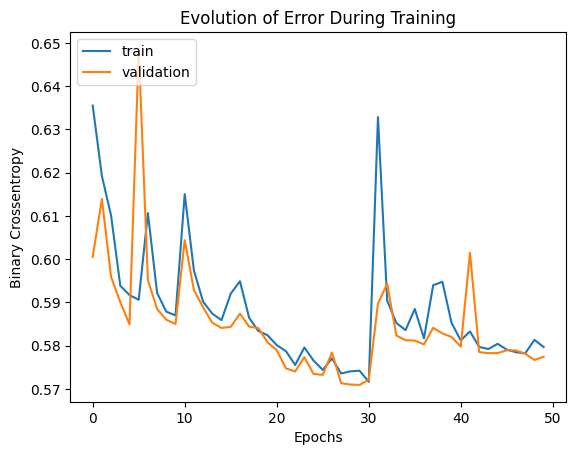

188/188 [==============================] - 5s 28ms/step - loss: 0.5769 - accuracy: 0.6025
Test accuracy: 0.6025148034095764 
Test error : 0.5769249200820923
188/188 [==============================] - 5s 24ms/step


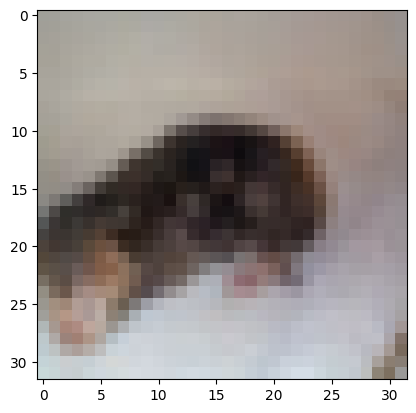

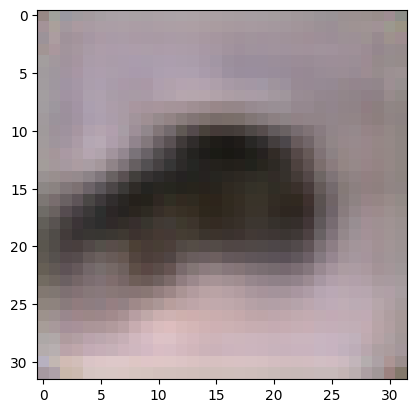

Experimenting with bigger stride model: 
Epoch 1/50
1500/1500 [==============================] - 21s 14ms/step - loss: 5.2875 - accuracy: 0.5095 - val_loss: 5.2857 - val_accuracy: 0.5094
Epoch 2/50
1500/1500 [==============================] - 19s 13ms/step - loss: 5.2807 - accuracy: 0.5096 - val_loss: 5.2810 - val_accuracy: 0.5094
Epoch 3/50
1500/1500 [==============================] - 19s 13ms/step - loss: 5.2789 - accuracy: 0.5096 - val_loss: 5.2805 - val_accuracy: 0.5094
Epoch 4/50
1500/1500 [==============================] - 19s 12ms/step - loss: 5.2786 - accuracy: 0.5096 - val_loss: 5.2803 - val_accuracy: 0.5094
Epoch 5/50
1500/1500 [==============================] - 18s 12ms/step - loss: 5.2784 - accuracy: 0.5096 - val_loss: 5.2801 - val_accuracy: 0.5094
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 5.2783 - accuracy: 0.5096 - val_loss: 5.2800 - val_accuracy: 0.5094
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 5.2782 

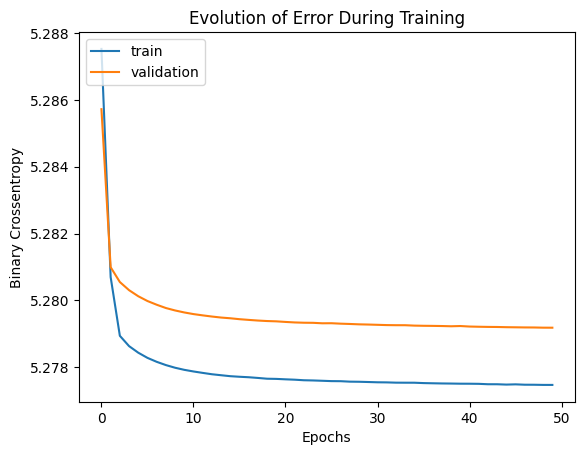

188/188 [==============================] - 1s 7ms/step - loss: 5.2748 - accuracy: 0.5066
Test accuracy: 0.5065698027610779 
Test error : 5.274768829345703
188/188 [==============================] - 1s 5ms/step


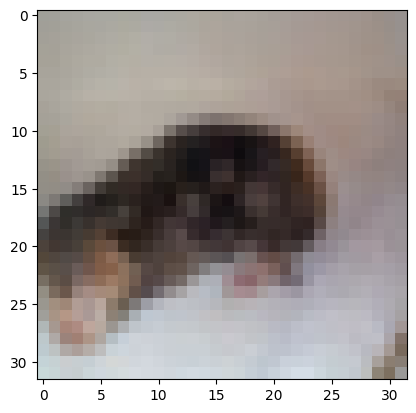

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


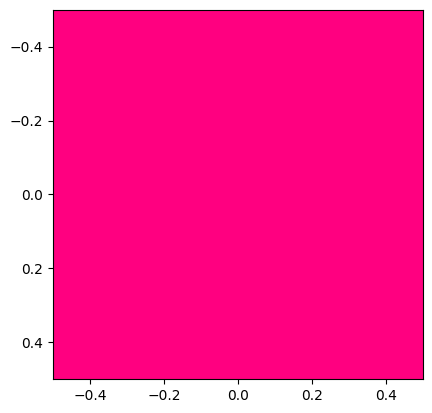

In [23]:
models = [create_cae_fewer_layers(), 
          create_cae_more_channels(),
          create_cae_fewer_channels(),
          create_cae_bigger_filter(),
          create_cae_bigger_stride(),
#          create_cae_valid_padding()
          ]

model_names = ["fewer layers",
               "more channels",
               "fewer channels",
               "bigger filter",
               "bigger stride",
#               "different padding"
               ]

for i in range(0, len(models)):
    experiment(models[i], model_names[i])

In [4]:
print(f"Latent space sizes: \n"
      f"- Fewer Layer: {compute_latent_space_size(16, 3, 1, 1, 16)} \n"
      f"- More Channels: {compute_latent_space_size(8, 3, 1, 1, 32)} \n"
      f"- Fewer Channels: {compute_latent_space_size(8, 3, 1, 1, 8)} \n"
      f"- Bigger Filter: {compute_latent_space_size(8, 5, 1, 1, 16)} \n"
      f"- Bigger Stride: {compute_latent_space_size(2, 3, 1, 2, 16)} \n")

Latent space sizes: 
- Fewer Layer: 4096.0 
- More Channels: 2048.0 
- Fewer Channels: 512.0 
- Bigger Filter: 576.0 
- Bigger Stride: 36.0 



# 3 Colorization of images
In the previous step create_cae_fewer_layers() was the one with the best validation accuracy. That is why we will be using this model here.

### Making the Images Grayscale

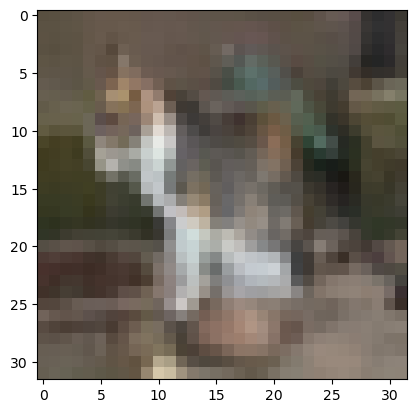

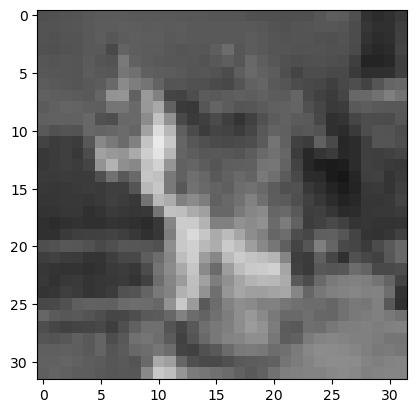

In [27]:
# code source: https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
# follows the matlab implementation of making an image grayscale
import numpy as np
import matplotlib.pyplot as plt

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#testing the function
img = X_train[0]
gray = rgb2gray(img)
plt.imshow(img)
plt.show()
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

### Defining and Fitting the model

In [28]:
# the model
color_model = tf.keras.models.Sequential()
color_model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu", input_shape=(32, 32, 1)))
color_model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
color_model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu"))
color_model.add(tf.keras.layers.UpSampling2D(2))
color_model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))

In [29]:
# prepping the data
X_train_gray = rgb2gray(X_train)
X_val_gray = rgb2gray(X_val)
X_test_gray = rgb2gray(X_test)

Epoch 1/150
1500/1500 [==============================] - 70s 45ms/step - loss: 0.5665 - accuracy: 0.4488 - val_loss: 0.5664 - val_accuracy: 0.4524
Epoch 2/150
1500/1500 [==============================] - 55s 37ms/step - loss: 0.5666 - accuracy: 0.4481 - val_loss: 0.5665 - val_accuracy: 0.4783
Epoch 3/150
1500/1500 [==============================] - 50s 33ms/step - loss: 0.5666 - accuracy: 0.4521 - val_loss: 0.5663 - val_accuracy: 0.4563
Epoch 4/150
1500/1500 [==============================] - 46s 31ms/step - loss: 0.5664 - accuracy: 0.4561 - val_loss: 0.5665 - val_accuracy: 0.4208
Epoch 5/150
1500/1500 [==============================] - 49s 33ms/step - loss: 0.5663 - accuracy: 0.4577 - val_loss: 0.5663 - val_accuracy: 0.4680
Epoch 6/150
1500/1500 [==============================] - 46s 31ms/step - loss: 0.5664 - accuracy: 0.4536 - val_loss: 0.5663 - val_accuracy: 0.4418
Epoch 7/150
1500/1500 [==============================] - 48s 32ms/step - loss: 0.5665 - accuracy: 0.4538 - val_loss: 0

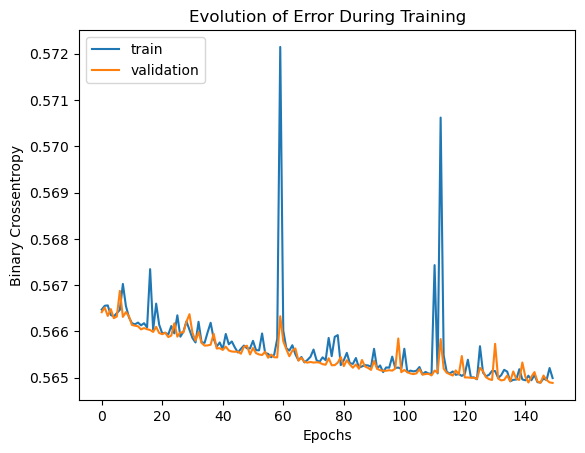

188/188 [==============================] - 2s 10ms/step - loss: 0.5644 - accuracy: 0.4658
Test accuracy: 0.4658077657222748 
Test error : 0.564355731010437
188/188 [==============================] - 2s 8ms/step

 Grayscale input


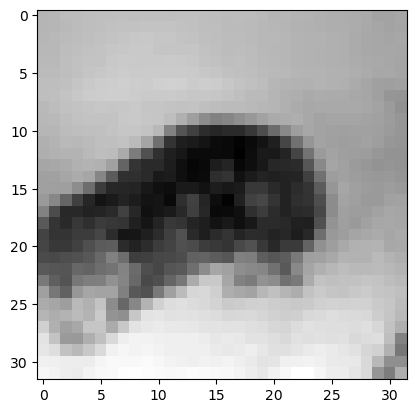

RGB output


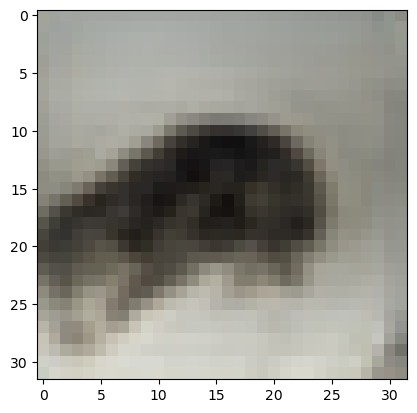

Original RGB image


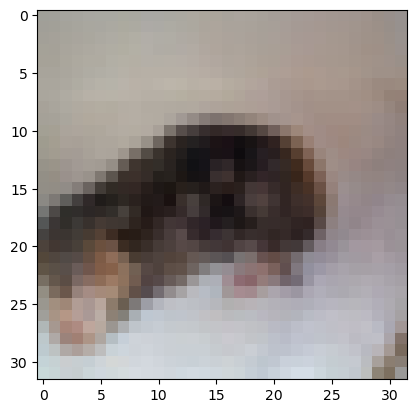

In [43]:
# running the training and testing
color_model.compile(optimizer="sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = color_model.fit(X_train_gray, X_train, epochs=150, validation_data=(X_val_gray, X_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Evolution of Error During Training')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

results = color_model.evaluate(X_test_gray, X_test)
print(f"Test accuracy: {results[1]} \nTest error : {results[0]}")

predictions = color_model.predict(X_test_gray)
print("\n Grayscale input")
plt.imshow(X_test_gray[0], cmap="gray")
plt.show()
print("RGB output")
plt.imshow(predictions[0])
plt.show()
print("Original RGB image")
plt.imshow(X_test[0])
plt.show()